In [81]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import pandas
from torch.autograd import Variable # torch 中 Variable 模块
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

##------------------------------------------------------------------------------------------------##
# class sonarDataset(Dataset):
#     ''' sonar dataset from UCI'''
    
#     #Initialize your data, download, etc..
#     def __int__(self):
# #         xy = np.loadtxt('sonar.csv',delimiter=' ', dtype=np.float32) # numpy load data
#         dataframe = pandas.read_csv("sonar.csv", header=None)
#         xy = dataframe.values
#         self.len = xy.shape[0]
#         self.x_data = torch.from_numpy(xy[:,0:-1])
#         self.y_data = torch.from_numpy(xy[:,[-1]])
        
#     def __getitem__(self, index):
#         return self.x_data[index], self.y_data[index]
    
#     def __len__(self):
#         return self.len

# dataset = sonarDataset()
# print(dataset.len)
# train_loader = DataLoader(dataset=dataset,
#                          batch_size=32,
#                          shuffle = True,
#                          num_workers = 2)
##------------------------------------------------------------------------------------------------##


# xy = np.loadtxt('sonar.csv',delimiter=' ', dtype=np.float32) # numpy load data
dataframe = pandas.read_csv("sonar.csv", header=None)
xy = dataframe.values

x_data0 = xy[:,0:-1].astype(np.float32) # have to add astype(float)
# x_data0 = xy[:,0:-1].astype(float) # have to add astype(float)
y_data0 = xy[:,[-1]]

x_data = torch.from_numpy(x_data0) 

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_data0)
y_data1 = encoder.transform(y_data0)

y_data = torch.from_numpy(y_data1) 
y_data = y_data.float()
# y_data = torch.from_numpy(np.array(y_data1, dtype='float')) 

print(x_data)
print(y_data)


tensor([[0.0200, 0.0371, 0.0428,  ..., 0.0084, 0.0090, 0.0032],
        [0.0453, 0.0523, 0.0843,  ..., 0.0049, 0.0052, 0.0044],
        [0.0262, 0.0582, 0.1099,  ..., 0.0164, 0.0095, 0.0078],
        ...,
        [0.0522, 0.0437, 0.0180,  ..., 0.0138, 0.0077, 0.0031],
        [0.0303, 0.0353, 0.0490,  ..., 0.0079, 0.0036, 0.0048],
        [0.0260, 0.0363, 0.0136,  ..., 0.0036, 0.0061, 0.0115]])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.

/Users/7jz/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/7jz/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer
        self.out_act = torch.nn.Sigmoid()
#         self.out_act = torch.nn.Sigmoid()

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.out(x)
        x = self.out_act(x)
        return x

net = Net(n_feature=60, n_hidden=100, n_output=1)     # define the network
print(net)  # net architecture

opt= torch.optim.SGD(net.parameters(), lr=0.02)
# loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted
loss_func = torch.nn.BCELoss()

# out = net(x_data)                 # input x and predict based on x
# loss = loss_func(out, y_data) 
# print(out)
# print(loss)

X = x_data
Y = y_data

/Users/7jz/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:2016: UserWarning: Using a target size (torch.Size([25])) that is different to the input size (torch.Size([25, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
/Users/7jz/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:2016: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


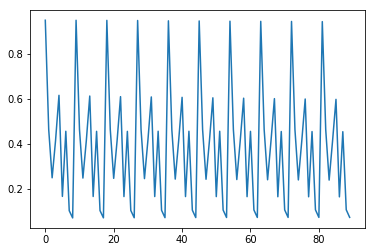

In [93]:
def train_epoch(model, opt, criterion, batch_size=25):
    model.train()
    losses = []
    for beg_i in range(0, X.size(0), batch_size):
        x_batch = X[beg_i:beg_i + batch_size, :]
        y_batch = Y[beg_i:beg_i + batch_size]
        x_batch = Variable(x_batch)
        y_batch = Variable(y_batch)

        opt.zero_grad()
        # (1) Forward
        y_hat = net(x_batch)
        # (2) Compute diff
        loss = criterion(y_hat, y_batch)
        # (3) Compute gradients
        loss.backward()
        # (4) update weights
        opt.step()        
        losses.append(loss.data.numpy())
    return losses


e_losses = []
num_epochs = 10
for i in range(num_epochs):
    e_losses += train_epoch(net, opt, loss_func)
#     print(e_losses)
#     e_losses.append(train_epoch(net, opt, loss_func))
    
plt.plot(e_losses)
# print(e_losses)